In [1]:
import pandas as pd
import os
import networkx as nx
import itertools
from netwulf import visualize
import netwulf as nw
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
author_df = pd.read_csv("C:\\Users\\mansj\\IQL\\salt\\data\\salt_cont_author.csv")

#### Add column full_name 

In [3]:
author_df["full_name"] = author_df['author_given_name'] + " " + author_df['author_surname'].fillna('')
author_df.head()

,ID,title,author_given_name,author_surname,author_id,organizational_author,manual,full_name
0,1,Systematic review of long term effects of advi...,Lee,Hooper,57202855325,NaN,False,Lee Hooper
1,1,Systematic review of long term effects of advi...,Christopher,Bartlett,57194377301,NaN,False,Christopher Bartlett
2,1,Systematic review of long term effects of advi...,George Davey,Smith,35354080500,NaN,False,George Davey Smith
3,1,Systematic review of long term effects of advi...,Shah,Ebrahim,7102093023,NaN,False,Shah Ebrahim
4,2,Reduced dietary salt for prevention of cardiov...,L.,Hooper,57202855325,NaN,False,L. Hooper


#### Author with same id have different names

In [4]:
author_df[author_df.author_id == 57202855325]

,ID,title,author_given_name,author_surname,author_id,organizational_author,manual,full_name
0,1,Systematic review of long term effects of advi...,Lee,Hooper,57202855325,NaN,False,Lee Hooper
4,2,Reduced dietary salt for prevention of cardiov...,L.,Hooper,57202855325,NaN,False,L. Hooper
8,3,Advice to reduce dietary salt for prevention o...,Lee,Hooper,57202855325,NaN,False,Lee Hooper
19,5,Reduced dietary salt for the prevention of car...,Lee,Hooper,57202855325,NaN,False,Lee Hooper
27,9,Effect of lower sodium intake on health: syste...,Lee,Hooper,57202855325,NaN,False,Lee Hooper
449,6,Reduced dietary salt for the prevention of car...,Lee,Hooper,57202855325,NaN,False,Lee Hooper


#### Grouping on author_id to get the different author names

In [5]:
list_authors  = pd.DataFrame(author_df.groupby('author_id')['full_name'].apply(list))
list_authors.loc[57202855325]

full_name    [Lee Hooper, L. Hooper, Lee Hooper, Lee Hooper...
Name: 57202855325, dtype: object

#### Convert it to a list and then to a dictionary to replace the author names with one common name


In [6]:
auth_list = list_authors.full_name.to_list()

auth_dict = dict()

for i in auth_list:
    i = list(set(i))
    if len(i) > 1:
        auth_dict[i[0]] = i[1:]

#### Function replaces the names of author with same id with the selected key in the dictionary
def replace(auth_name, final_dict):
    for k, v in final_dict.items():
        if auth_name in v:
            auth_name = k
            
    return auth_name
    

author_df.full_name = author_df.full_name.apply(lambda x : replace (x, auth_dict))

#### Check if the author names are changed to one name

In [7]:

author_df[author_df.author_id == 57202855325]

,ID,title,author_given_name,author_surname,author_id,organizational_author,manual,full_name
0,1,Systematic review of long term effects of advi...,Lee,Hooper,57202855325,NaN,False,L. Hooper
4,2,Reduced dietary salt for prevention of cardiov...,L.,Hooper,57202855325,NaN,False,L. Hooper
8,3,Advice to reduce dietary salt for prevention o...,Lee,Hooper,57202855325,NaN,False,L. Hooper
19,5,Reduced dietary salt for the prevention of car...,Lee,Hooper,57202855325,NaN,False,L. Hooper
27,9,Effect of lower sodium intake on health: syste...,Lee,Hooper,57202855325,NaN,False,L. Hooper
449,6,Reduced dietary salt for the prevention of car...,Lee,Hooper,57202855325,NaN,False,L. Hooper


#### Check if the author with same id are replaced with a common name

In [8]:
id_df_1 = author_df[['author_id','full_name']]
merged_df_1 = id_df_1.merge(id_df_1, how='left', left_on='author_id', right_on='author_id')
auth_dict_1= merged_df_1[merged_df_1['full_name_x'] != merged_df_1['full_name_y']]
auth_dict_1

,author_id,full_name_x,full_name_y


In [9]:
# Create the nodes and edges of the graph from the given dataframe by grouping on the paper ID
G = nx.Graph()
edges = pd.DataFrame(author_df.groupby('ID')['full_name'].apply(list))['full_name'].to_list()

In [10]:
# Counting the number of times the two authors have worked together on a paper
new  = []
for i in edges:
    if len(i) >= 2:
        for subset in itertools.combinations(i,2):
            if len(subset) == 2:
                new.append(subset)
sorted_list = []
for i in new:
    sorted_list.append(tuple(sorted(list(i))))
    
count_auth = Counter(sorted_list)

In [11]:
# Adding the edges to the graph with the weights (number of times the authors have worked together)
for k, v in count_auth.items():
    G.add_edge(k[0], k[1],  weight = v,  length = v)
G.remove_nodes_from(list(nx.isolates(G)))

### Visualized with the help of netwulf. The network data tuned by the visualization is posted back to Python. 
- The visualization function returns two dictionaries.
1. the first containing information about the stylized network.
2. The second containing information about the visualization control configuration which can be used to reproduce the same visualization.


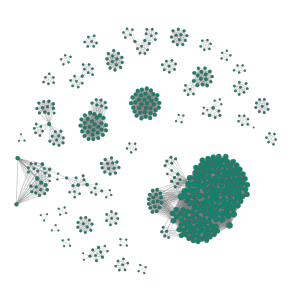

In [40]:
#Uncomment and run the below code to configure the visualization in a different way (different from the set config)

styled_network, config = nw.visualize(G)

In [42]:
## Config that remains same for the generated visualizations
config = {'zoom': 0.9313611111111111,
 'node_charge': -29.54650673400674,
 'node_gravity': 0.11840698653198653,
 'link_distance': 15,
 'link_distance_variation': 0,
 'node_collision': True,
 'wiggle_nodes': False,
 'freeze_nodes': True,
 'node_fill_color': '#0d866d',
 'node_stroke_color': '#555555',
 'node_label_color': '#560909',
 'display_node_labels': False,
 'scale_node_size_by_strength': True,
 'node_size': 9.368160774410775,
 'node_stroke_width': 1,
 'node_size_variation': 0.27764520202020204,
 'link_color': '#7c7c7c',
 'link_width': 2,
 'link_alpha': 0.5,
 'link_width_variation': 0.5,
 'display_singleton_nodes': True,
 'min_link_weight_percentile': 0,
 'max_link_weight_percentile': 1}

#### Run the below code to generate the visualization.
- The visualization will open in a new window
- To revert back to the code, select the post to python option in the menu, located on the right side of the window.

In [ ]:
nw.visualize(G, config=config)

#### Visualizing the main connected component of the graph

In [18]:
# giant = max(nx.connected_components(G), key=len)

# giant_list = list(giant)

# N = nx.Graph()

# for node in G.nodes():
#     if node in giant_list:
#         for k, v in G.edges(node):
#             N.add_edge(k,v, weight = G[k][v]["weight"])

In [19]:
# article_df = pd.read_csv("C://Users//mansj//IQL//salt//data/article_list.csv")
# article_df.head()

# author_df.head()

In [20]:
top_four = sorted(nx.connected_components(G), key=len, reverse=True)[:4]

top_list = []
for i in top_four:
    for j in i:
        top_list.append(j)
    
T = nx.Graph()
for node in G.nodes():
    if node in top_list:
        for k, v in G.edges(node):
            T.add_edge(k,v, weight = G[k][v]["weight"])
        

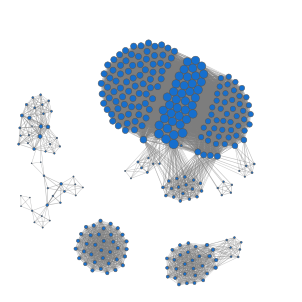

In [25]:
styled_network, config = nw.visualize(T)

In [27]:
config_four = {'zoom': 1.2347685185185187,
 'node_charge': -41.613846801346796,
 'node_gravity': 0.21322180134680135,
 'link_distance': 15,
 'link_distance_variation': 0,
 'node_collision': True,
 'wiggle_nodes': False,
 'freeze_nodes': False,
 'node_fill_color': '#166fce',
 'node_stroke_color': '#555555',
 'node_label_color': '#000000',
 'display_node_labels': False,
 'scale_node_size_by_strength': True,
 'node_size': 8.075231481481481,
 'node_stroke_width': 1.011679292929293,
 'node_size_variation': 0.5103724747474747,
 'link_color': '#7c7c7c',
 'link_width': 2,
 'link_alpha': 0.5,
 'link_width_variation': 0.5,
 'display_singleton_nodes': True,
 'min_link_weight_percentile': 0,
 'max_link_weight_percentile': 1}

### Visualized with the help of netwulf. The network data tuned by the visualization is posted back to Python. 
- The visualization function returns two dictionaries.
1. the first containing information about the stylized network.
2. The second containing information about the visualization control configuration which can be used to reproduce the same visualization.


In [30]:
#Uncomment and run the below code to configure the visualization in a different way
nw.visualize(T, config=config_four)

(None, None)

#### Below configuration can be used to reproduce the final visualization created for the co-author network (main component - largest connected component)

In [128]:
# plt.figure(figsize=(300, 300))
# edges = N.edges()
# weights = [N[u][v]['weight'] for u,v in edges]
# nx.draw(N, font_size = 30, with_labels = True, width = weights)
# plt.savefig('main_component.jpg')

#### Top 10 authors with most number of co-authors

In [31]:
c_a = Counter(author_df["full_name"].to_list())
c_a = sorted(c_a.items(), key = lambda x : x[1], reverse=True)
num_auth_df = pd.DataFrame(c_a, index = range(1,len(c_a)+1))
num_auth_df.rename(columns={0 : "author_name", 1 : "number_of_coauthors"}, inplace=True)
num_auth_df[:10]

,author_name,number_of_coauthors
1,Paul K. Whelton,8
2,JA Cutler,8
3,Michael H. Alderman,7
4,Lawrence J. Appel,7
5,P DiPasquale,7
6,L. Hooper,6
7,S. Ebrahim,6
8,Hillel W. Cohen,6
9,Salvatore Paterna,6
10,Shiriki Kumanyika,5


In [32]:
# function to get the results of centrality (degree, betweenness, closeness) in the dataframe
def df_table(centrality_name, column_name):
    c_list = sorted(centrality_name.items(), key = lambda x : x[1], reverse=True)

    c_dict = dict()
    for i in c_list[:10]:
        c_dict[i[0]] = round(i[1]*100,2)
    final_df = pd.DataFrame(list(c_dict.items()), index = range(1,11))
    final_df.rename(columns= {0 : "author_name", 1: column_name}, inplace = True)
    return final_df

In [33]:
#degree centrality
degree_unwe = nx.degree_centrality(G)
degree_df = df_table(degree_unwe, "degree_centrality")
degree_df

,author_name,degree_centrality
1,JA Cutler,32.83
2,Nemat O. Borhani,30.81
3,Arlene W. Caggiula,30.81
4,Paul K. Whelton,29.97
5,Lawrence J. Appel,29.46
6,Shiriki Kumanyika,29.12
7,William B. Applegate,28.96
8,Julie Buring,28.11
9,Nancy Cook,28.11
10,Eva Obarzanek,28.11


In [34]:
#betweeness centrality
betweeness_cent = nx.betweenness_centrality(G)
between_df = df_table(betweeness_cent, "betweenness_centrality")
between_df

,author_name,betweenness_centrality
1,JA Cutler,0.93
2,Paul K. Whelton,0.74
3,Lawrence J. Appel,0.38
4,Nemat O. Borhani,0.35
5,Arlene W. Caggiula,0.35
6,P DiPasquale,0.31
7,Rod S. Taylor,0.28
8,Janet Raines,0.24
9,L. Hooper,0.19
10,Shiriki Kumanyika,0.18


In [35]:
#closeness centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_df = df_table(closeness_centrality, "closeness_centrality")
closeness_df

,author_name,closeness_centrality
1,JA Cutler,32.87
2,Nemat O. Borhani,31.08
3,Arlene W. Caggiula,31.08
4,Paul K. Whelton,30.40
5,Lawrence J. Appel,30.00
6,Shiriki Kumanyika,29.74
7,William B. Applegate,29.61
8,Julie Buring,28.98
9,Nancy Cook,28.98
10,Eva Obarzanek,28.98


In [36]:
eigenvector_centrality = nx.eigenvector_centrality(G)
eigen_list = sorted(eigenvector_centrality.items(), key = lambda x : x[1], reverse=True)

eigen_dict = dict()
for i in eigen_list[:10]:
    eigen_dict[i[0]] = round(i[1]*100,2)
final_df = pd.DataFrame(list(eigen_dict.items()), index = range(1,11))
final_df.rename(columns= {0 : "author_name", 1: "eigenvector_centrality"}, inplace = True)
final_df

,author_name,eigenvector_centrality
1,JA Cutler,9.98
2,Nemat O. Borhani,9.95
3,Arlene W. Caggiula,9.95
4,Paul K. Whelton,9.91
5,Lawrence J. Appel,9.90
6,Shiriki Kumanyika,9.90
7,William B. Applegate,9.90
8,Julie Buring,9.88
9,Nancy Cook,9.88
10,Eva Obarzanek,9.88


In [38]:
# effective_size = nx.effective_size(G)
# effective_list = sorted(effective_size.items(), key = lambda x : x[1], reverse=True)

# effective_dict = dict()
# for i in effective_list[:10]:
#     effective_dict[i[0]] = round(i[1],2)
# final_ef_df = pd.DataFrame(list(effective_dict.items()), index = range(1,11))
# final_ef_df.rename(columns= {0 : "author_name", 1: "effective_size"}, inplace = True)
# final_ef_df
